In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [147]:
df = pd.read_csv("letter-recognition.csv")

In [148]:
df.columns = ["Letter","x-box","y-box","width","height","pixels","x-bar","y-bar","x2bar","y2bar","xybar","x2ybr","xy2br","x-ege","xegvy","y-ege","yegvx"]

In [149]:
df

,Letter,x-box,y-box,width,height,pixels,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


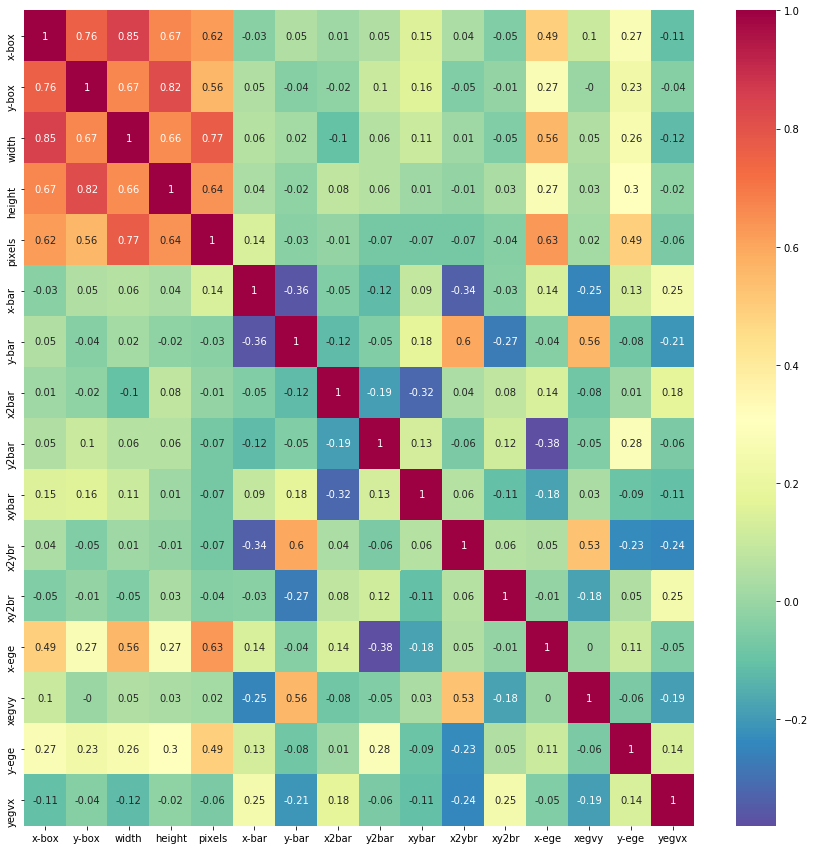

In [150]:
cormat = df.corr()
cormat = round(cormat,2)
plt.figure(figsize=(15,15))
sns.heatmap(cormat, cmap='Spectral_r', annot=True)

# Feature selection

In [151]:
X = df.drop("Letter",axis=1)
Y = df["Letter"]

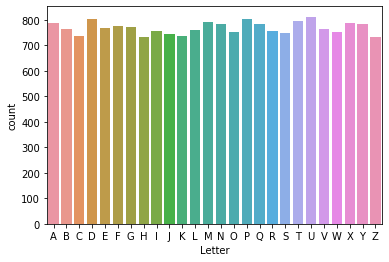

In [152]:
ax = sns.countplot(Y.sort_values() ,label="Count")

Висока корелација помеѓу width и x-box, height и y-box, pixels и width

In [153]:
drop_list = ["x-box","y-box","pixels"]
X_tmp = X.drop(drop_list,axis=1)
X_tmp.head()

,width,height,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,3,7,10,5,5,4,13,3,9,2,8,4,10
1,6,8,10,6,2,6,10,3,7,3,7,3,9
2,6,6,5,9,4,6,4,4,10,6,10,2,8
3,3,1,8,6,6,6,6,5,9,1,7,5,10
4,5,8,8,8,6,9,5,6,6,0,8,9,7


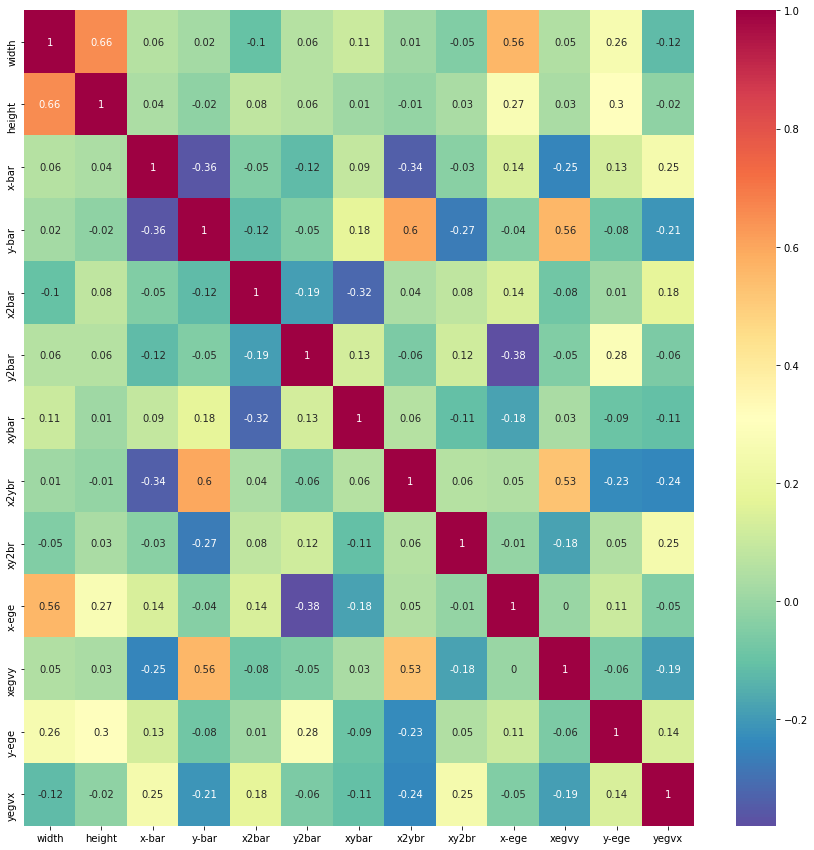

In [154]:
cormat = X_tmp.corr()
cormat = round(cormat,2)
plt.figure(figsize=(15,15))
sns.heatmap(cormat, cmap='Spectral_r', annot=True)

# Classification models

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [156]:
x_train, x_test, y_train, y_test = train_test_split(X_tmp, Y, test_size=0.3, random_state=42)

### RandomForestClassifier

Accuracy is:  0.9625
Precision is:  0.9631727309961191
Recall is:  0.9622083233077878


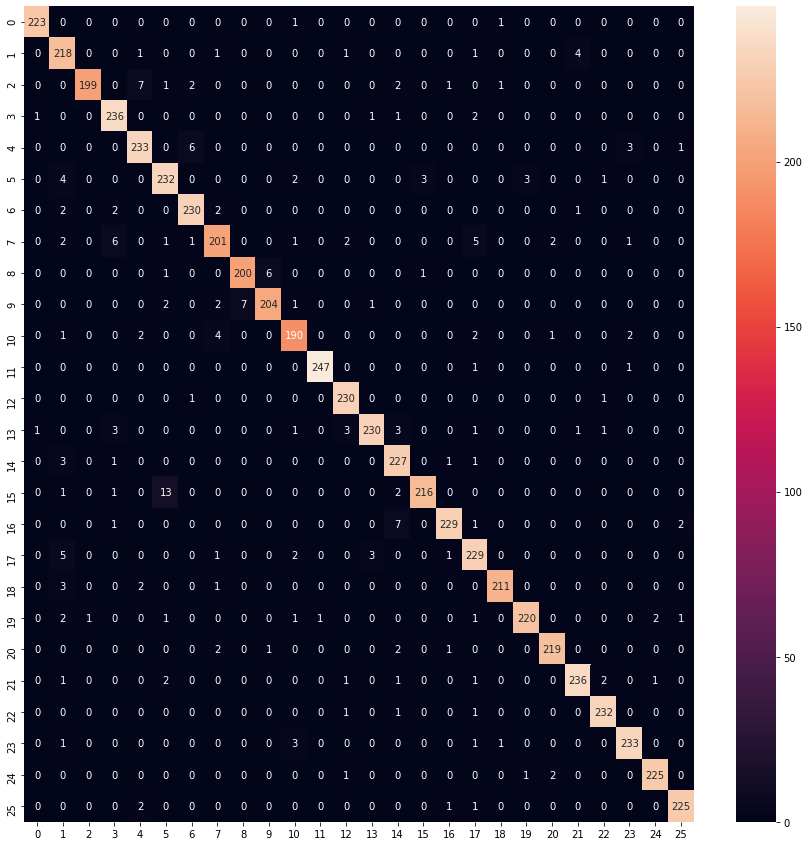

In [157]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

y_pred = clf_rf.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average="macro"))
print('Recall is: ', recall_score(y_test, y_pred, average="macro"))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt="d")

### Logistic regression

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=500)

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Solver: ", solver)
    print('Accuracy is: ', accuracy_score(y_test, y_pred))
    print('Precision is: ', precision_score(y_test, y_pred, average="macro"))
    print('Recall is: ', recall_score(y_test, y_pred, average="macro"))
    print("\n")
    

Solver:  newton-cg
Accuracy is:  0.7533333333333333
Precision is:  0.7522240469093167
Recall is:  0.75256378900433




D:\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Solver:  lbfgs
Accuracy is:  0.7541666666666667
Precision is:  0.7533831564847012
Recall is:  0.7532990096234509


Solver:  liblinear
Accuracy is:  0.6915
Precision is:  0.6964023774137472
Recall is:  0.6908705455227478




D:\Conda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Solver:  sag
Accuracy is:  0.7515
Precision is:  0.7513385979967425
Recall is:  0.7508054371739561


Solver:  saga
Accuracy is:  0.7481666666666666
Precision is:  0.7484239649042461
Recall is:  0.7476547961304821




D:\Conda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Support vector machine

In [160]:
from sklearn.svm import SVC

In [161]:
model = SVC(kernel="poly")

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average="macro"))
print('Recall is: ', recall_score(y_test, y_pred, average="macro"))

Accuracy is:  0.9328333333333333
Precision is:  0.9338206925203519
Recall is:  0.9329161814526111


### Naive Bayes classifier

In [162]:
from sklearn.naive_bayes import MultinomialNB

In [163]:
model = MultinomialNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average="macro"))
print('Recall is: ', recall_score(y_test, y_pred, average="macro"))

Accuracy is:  0.5696666666666667
Precision is:  0.5746440448739795
Recall is:  0.5670722491625552


### Neural network

In [200]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [202]:
enc = OneHotEncoder(handle_unknown='ignore')

Y_encoded = pd.DataFrame(enc.fit_transform(df[['Letter']]).toarray())

In [203]:
x_train, x_test, y_train, y_test = train_test_split(X_tmp, Y_encoded, test_size=0.3, random_state=42)

In [204]:
model = Sequential()
model.add(Dense(256, input_dim = len(X_tmp.columns)))
model.add(Dense(256, activation="relu", kernel_initializer="normal"))
model.add(Dense(256, activation="relu", kernel_initializer="normal"))
model.add(Dense(256, activation="relu", kernel_initializer="normal"))
model.add(Dense(26, activation="sigmoid"))

In [205]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [206]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Train on 12599 samples, validate on 1400 samples
Epoch 1/10
12599/12599 [==============================] - 3s 277us/step - loss: 1.3336 - accuracy: 0.5911 - val_loss: 0.7989 - val_accuracy: 0.7307
Epoch 2/10
12599/12599 [==============================] - 3s 220us/step - loss: 0.6189 - accuracy: 0.8014 - val_loss: 0.5014 - val_accuracy: 0.8350
Epoch 3/10
12599/12599 [==============================] - 3s 220us/step - loss: 0.4310 - accuracy: 0.8567 - val_loss: 0.4705 - val_accuracy: 0.8471
Epoch 4/10
12599/12599 [==============================] - 3s 219us/step - loss: 0.3535 - accuracy: 0.8839 - val_loss: 0.3694 - val_accuracy: 0.8850
Epoch 5/10
12599/12599 [==============================] - 3s 220us/step - loss: 0.2989 - accuracy: 0.9000 - val_loss: 0.3050 - val_accuracy: 0.8993
Epoch 6/10
12599/12599 [==============================] - 3s 220us/step - loss: 0.2459 - accuracy: 0.9156 - val_loss: 0.3231 - val_accuracy: 0.8971
Epoch 7/10
12599/12599 [==============================] - 3s 22

In [223]:
y_pred = model.predict(x_test)
def transform_row(row):
    max_value = max(row)
    return [1 if value == max_value else 0 for value in row]

y_pred_t = [transform_row(row) for row in y_pred]

model.predict враќа листа од веројатности, па затоа се трансформира во листа од 0 и 1 така што се става 1 на највисоката веројатност од соодветната редица

In [226]:
print('Accuracy is: ', accuracy_score(y_test, y_pred_t))
print('Precision is: ', precision_score(y_test, y_pred_t, average="macro"))
print('Recall is: ', recall_score(y_test, y_pred_t, average="macro"))

Accuracy is:  0.8936666666666667
Precision is:  0.9029156813127316
Recall is:  0.8946384011852965
